In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [5]:
df = pd.read_csv('/content/clusteringweek06.csv')
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

In [8]:
# Preprocessing (Standardize the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

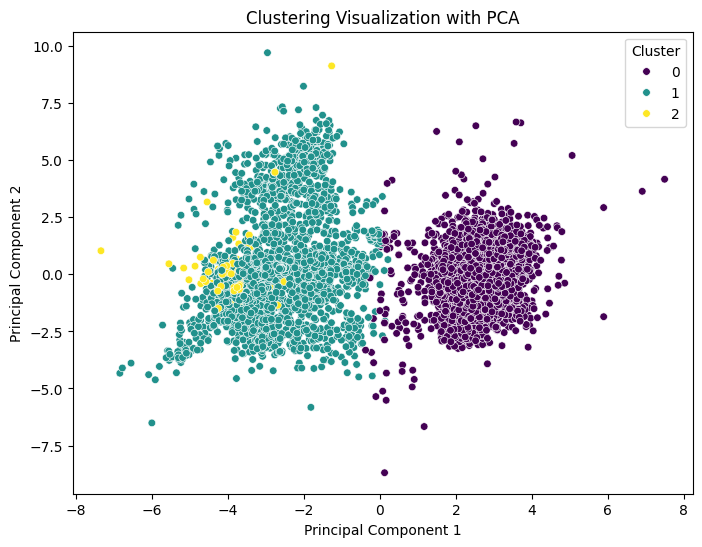

In [9]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

# Clustering dengan KMeans (ubah ke model lain jika diperlukan)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette="viridis", s=30)
plt.title("Clustering Visualization with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

**KMeans**

In [10]:
kmeans_silhouette_scores = []
kmeans_inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
    kmeans_silhouette_scores.append(silhouette_avg)
    kmeans_inertia.append(kmeans.inertia_)

# Find knee point for KMeans
knee = KneeLocator(range(2, 11), kmeans_inertia, curve='convex', direction='decreasing').knee

# Fit KMeans with optimal k (knee)
kmeans_opt = KMeans(n_clusters=knee, random_state=0)
kmeans_labels = kmeans_opt.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)

# Calculate evaluation metrics for each clustering model
# K-Means Metrics
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(df_scaled, kmeans_labels)

**Agglomerative Clustering**

In [11]:
agg_silhouette_scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, agg_labels)
    agg_silhouette_scores.append(silhouette_avg)

# Optimal n_clusters for Agglomerative Clustering
optimal_clusters_agg = range(2, 11)[np.argmax(agg_silhouette_scores)]
agg_opt = AgglomerativeClustering(n_clusters=optimal_clusters_agg)
agg_labels = agg_opt.fit_predict(df_scaled)
agg_silhouette = max(agg_silhouette_scores)

# Agglomerative Clustering Metrics
agg_davies_bouldin = davies_bouldin_score(df_scaled, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(df_scaled, agg_labels)

**DBSCAN**

In [12]:
dbscan_silhouette_scores = []
eps_values = np.arange(0.1, 2.0, 0.1)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)
    if len(set(dbscan_labels)) > 1:  # To ensure there is more than one cluster
        silhouette_avg = silhouette_score(df_scaled, dbscan_labels)
        dbscan_silhouette_scores.append((eps, silhouette_avg))

# Optimal eps for DBSCAN
optimal_eps_dbscan, dbscan_silhouette = max(dbscan_silhouette_scores, key=lambda x: x[1])
dbscan_opt = DBSCAN(eps=optimal_eps_dbscan, min_samples=5)
dbscan_labels = dbscan_opt.fit_predict(df_scaled)


# DBSCAN Metrics (only consider non-noise points)
dbscan_davies_bouldin = davies_bouldin_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
dbscan_calinski_harabasz = calinski_harabasz_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])

**KESIMPULAN**

In [13]:
# Display the results
print("Clustering Model Evaluation Metrics:\n")
print(f"K-Means: (k={knee})")
print(f" - Silhouette Score: {kmeans_silhouette:.2f}")
print(f" - Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f" - Calinski-Harabasz Index: {kmeans_calinski_harabasz:.2f}\n")

print(f"Agglomerative Clustering: (n_clusters={optimal_clusters_agg})")
print(f" - Silhouette Score: {agg_silhouette:.2f}")
print(f" - Davies-Bouldin Index: {agg_davies_bouldin:.2f}")
print(f" - Calinski-Harabasz Index: {agg_calinski_harabasz:.2f}\n")

print(f"DBSCAN: (eps={optimal_eps_dbscan:.1f})")
print(f" - Silhouette Score: {dbscan_silhouette:.2f}")
print(f" - Davies-Bouldin Index: {dbscan_davies_bouldin:.2f}")
print(f" - Calinski-Harabasz Index: {dbscan_calinski_harabasz:.2f}\n")

# Determining the best model based on metrics
print("Summary:")
if (kmeans_silhouette > agg_silhouette and kmeans_silhouette > dbscan_silhouette):
    best_model = "K-Means"
elif (agg_silhouette > kmeans_silhouette and agg_silhouette > dbscan_silhouette):
    best_model = "Agglomerative Clustering"
else:
    best_model = "DBSCAN"

print(f"Best Model Based on Silhouette Score: {best_model}")

if (min(kmeans_davies_bouldin, agg_davies_bouldin, dbscan_davies_bouldin) == kmeans_davies_bouldin):
    best_model_db = "K-Means"
elif (min(kmeans_davies_bouldin, agg_davies_bouldin, dbscan_davies_bouldin) == agg_davies_bouldin):
    best_model_db = "Agglomerative Clustering"
else:
    best_model_db = "DBSCAN"

print(f"Best Model Based on Davies-Bouldin Index: {best_model_db}")

if (max(kmeans_calinski_harabasz, agg_calinski_harabasz, dbscan_calinski_harabasz) == kmeans_calinski_harabasz):
    best_model_ch = "K-Means"
elif (max(kmeans_calinski_harabasz, agg_calinski_harabasz, dbscan_calinski_harabasz) == agg_calinski_harabasz):
    best_model_ch = "Agglomerative Clustering"
else:
    best_model_ch = "DBSCAN"

print(f"Best Model Based on Calinski-Harabasz Index: {best_model_ch}")

Clustering Model Evaluation Metrics:

K-Means: (k=7)
 - Silhouette Score: 0.28
 - Davies-Bouldin Index: 1.34
 - Calinski-Harabasz Index: 1770.32

Agglomerative Clustering: (n_clusters=3)
 - Silhouette Score: 0.35
 - Davies-Bouldin Index: 1.46
 - Calinski-Harabasz Index: 2329.63

DBSCAN: (eps=1.7)
 - Silhouette Score: 0.18
 - Davies-Bouldin Index: 0.91
 - Calinski-Harabasz Index: 565.94

Summary:
Best Model Based on Silhouette Score: Agglomerative Clustering
Best Model Based on Davies-Bouldin Index: DBSCAN
Best Model Based on Calinski-Harabasz Index: Agglomerative Clustering


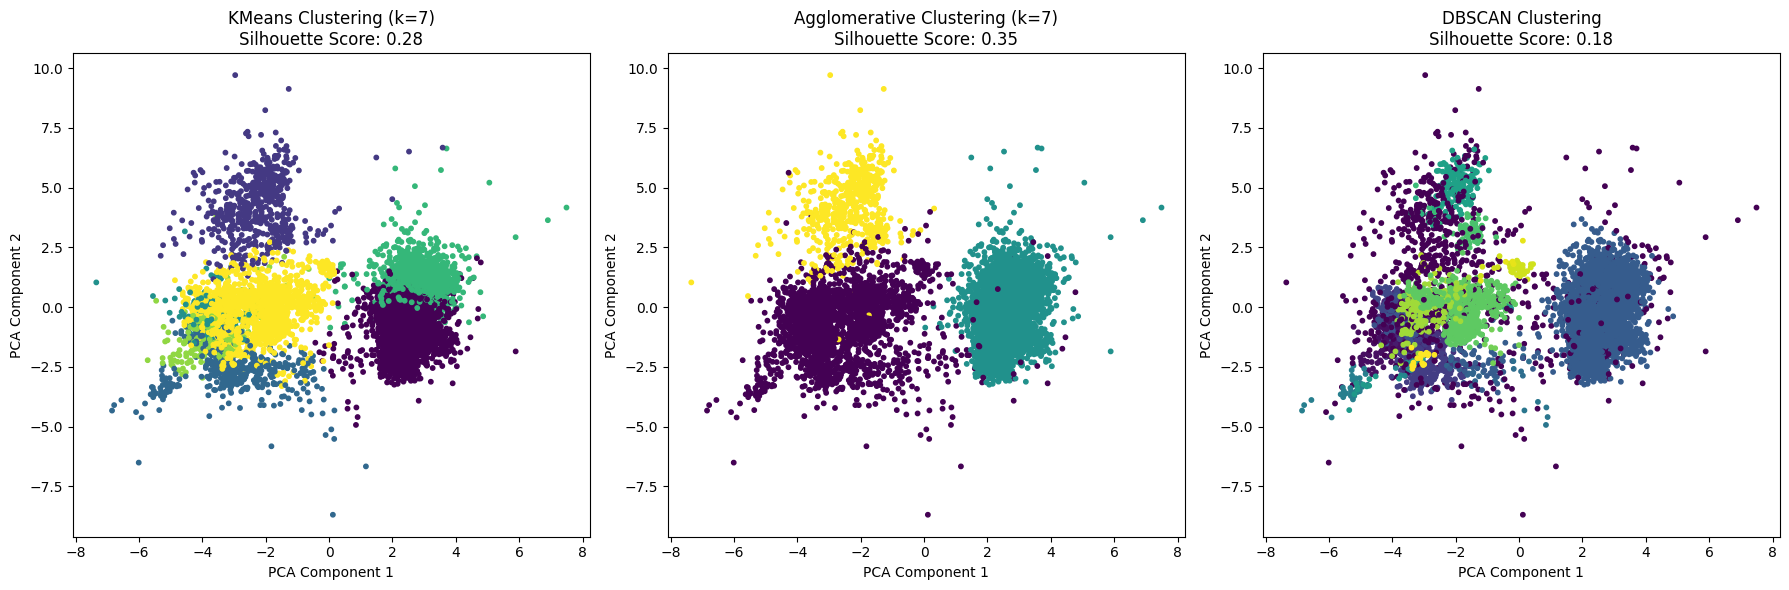

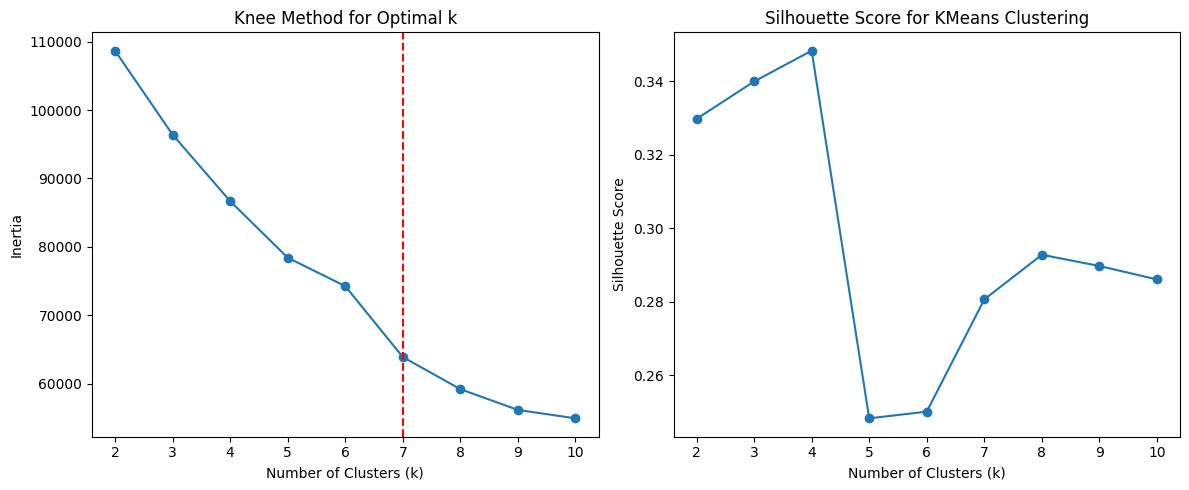

In [14]:
# Step 4: Visualization
plt.figure(figsize=(18, 6))

# Plot KMeans clustering
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title(f'KMeans Clustering (k={knee})\nSilhouette Score: {kmeans_silhouette_scores[knee-2]:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot Agglomerative clustering
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_labels, cmap='viridis', s=10)
plt.title(f'Agglomerative Clustering (k={knee})\nSilhouette Score: {agg_silhouette:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot DBSCAN clustering
plt.subplot(1, 3, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title(f'DBSCAN Clustering\nSilhouette Score: {dbscan_silhouette:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Step 5: Plot Knee and Silhouette Scores
# Plot Knee for KMeans
plt.figure(figsize=(12, 5))

# Knee (Inertia vs. Number of Clusters)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), kmeans_inertia, marker='o')
plt.axvline(knee, color='red', linestyle='--')
plt.title('Knee Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Scores for KMeans
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), kmeans_silhouette_scores, marker='o')
plt.title('Silhouette Score for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
